# Metodi Numerici di Risoluzione di Equazioni Differenziali

Come prima cosa importo le librerie necessarie:

In [15]:
import matplotlib.pyplot as plt
import numpy as np


## Risoluzione a una dimensione

Definiamo la *funzione* dell'*equazione differenziale*:

$$ \dot x = f(x) $$

In [35]:
def chosen_function(x, t=1):
    return (np.sin(x)-x)/x

### Metodo di Eulero

L'Algoritmo di Eulero è un metodo numerico per la risoluzione delle equazioni differenziali ad una variabile. \
Si basa su un procedimento iterativo che sfrutta la relazione:
$$ \frac{dx}{dt} \simeq \frac{x(t_1) - x(t_0)}{\Delta t} = f(x_0) $$
Quindi per ottenere il punto $x(t_1)$ avendo solo $x(t_0)$ applico la formula: 
$$ x(t_1) = f(x_0) \Delta t + x_0 $$
Generalizzando e iterando:
$$ x(t_n) = f(x_{n-1}) \Delta t + x_{n-1} $$
con $\Delta t$ fissato, non troppo grande perché un valore troppo grande porterebbe ad un'imprecisione nella risoluzione numerica

In [22]:
def euler_method(initial_time, final_time, initial_value, delta_time, modified=False):
    time = initial_time
    result = initial_value
    elements = round((final_time - initial_time)/delta_time)
    
    time_vector = np.empty(elements)
    result_vector = np.empty(elements)
    
    for i in range(elements):
        time_vector[i] = time
        result_vector[i] = result
        
        time += delta_time

        if modified:
            fake_result = chosen_function(result, time)*delta_time + result
            result += (chosen_function(result, time)+chosen_function(fake_result, time))*delta_time/2
        else:
            result += chosen_function(result, time)*delta_time

    return time_vector, result_vector

#### Eulero Modificato

Con una leggera modifica all'Algoritmo di Eulero si ottiene un significativo incremento alla precisione:

$$ \tilde{x_1} = x_0 + f(x_0)\Delta t \\
x_1 = x_0 + \frac{1}{2}(f(x_0)+f(\tilde{x_1}))\Delta t $$

### Metodo di Runge-Kutta

Attraverso delle modifiche opportune di parametri e sviluppo in serie di Taylor si riesce ad ottenere un metodo iterativo composto da quattro equazioni che riduce significativamente l'errore del calcolo dell'equazione differenziale:
$$ K_1 = f(x_n)\Delta t \\
K_2 = f(x_n + \frac{1}{2}K_1)\Delta t \\
K_3 = f(x_n + \frac{1}{2}K_2)\Delta t \\
K_4 = f(x_n + K_3)\Delta t \\
x_{n+1} = x_n + \frac{1}{6}(K_1 + 2K_2 + 2K_3 + K_4)$$

In [27]:
def runge_kutta_method(initial_time, final_time, initial_value, delta_time):
    time = initial_time
    result = initial_value
    elements = round((final_time - initial_time)/delta_time)
    
    time_vector = np.empty(elements)
    result_vector = np.empty(elements)

    for i in range(elements):
        time_vector[i] = time
        result_vector[i] = result
        
        time += delta_time

        fake_results_1 = chosen_function(result, time)*delta_time
        fake_results_2 = chosen_function(result+0.5*fake_results_1, time)*delta_time
        fake_results_3 = chosen_function(result+0.5*fake_results_2, time)*delta_time
        fake_results_4 = chosen_function(result+fake_results_3, time)*delta_time
        result += (fake_results_1+ 2*fake_results_2+ 2*fake_results_3+ fake_results_4)/6
    
    
    return time_vector, result_vector

## Utilizzare i Metodi

Per prima cosa bisogna inserire i parametri $t_0$, $t_{finale}$, $x_0$, $\Delta t$:

In [32]:
initial_time = 3
final_time = 8
initial_value = 0.01
delta_time = 0.01

Successivamente bisognerà chiamare il metodo che interessa usare per calcolare l'equazione differenziale.

### Usare Eulero

In [36]:
times, results = euler_method(initial_time, final_time, initial_value, delta_time)

### Usare Eulero Modificato

In [38]:
times, results = euler_method(initial_time, final_time, initial_value, delta_time, modified=True)

### Usare Runge-Kutta

In [40]:
times, results = runge_kutta_method(initial_time, final_time, initial_value, delta_time)

## Graficare il Risultato Ottenuto

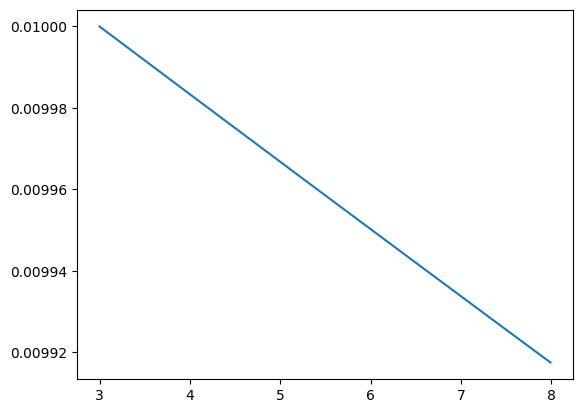

In [41]:
plt.plot(times, results)
plt.show()

## Soluzioni al variare del valore iniziale
In un'equazione differenziale, al variare del valore iniziale, il risultato si comporta in maniere interessanti dipendentemente dall'equazione presa in esame.
Questo è materia di studio dei sistemi dinamici: la predizione del comportamento di un'equazione differenziale sul piano $t-x$.

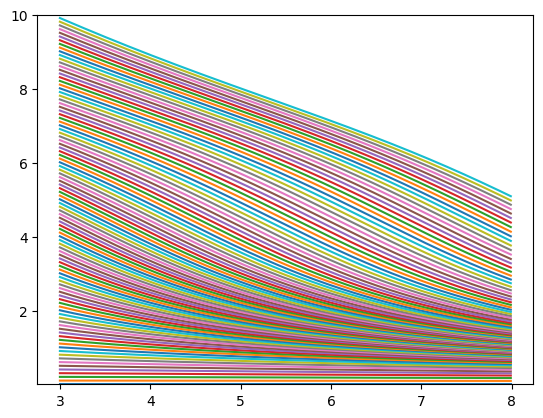

In [42]:
initial_value_start = 0.01
initial_value_stop = 10
value_step = 0.1
plt.ylim(initial_value_start, initial_value_stop)

for initial_value in np.arange(initial_value_start, initial_value_stop, value_step):
    times, results = euler_method(initial_time, final_time, initial_value, delta_time)
    plt.plot(times, results)
plt.show()

# Equazioni differenziali a più variabili
Nel caso volessimo studiare numericamente le equazioni differenziali a più variabili dovremmo applicare gli algoritmi visti in precedenza ma con in input il vettore delle coordinate.
Nel caso di equazioni differenziali di $n°$ grado si possono separare in $n$ equazioni di primo grado attraverso un cambio di variabile.

$$\begin{cases}
\dot x = f(x, y, t) \\
\dot y = g(x, y, t)
\end{cases}$$

In [43]:
def chosen_function(x, y, t=1):
    function1 = -2*np.cos(x)-np.cos(y)
    function2 = -2*np.cos(y)-np.cos(x)
    return function1, function2

In questo caso prendiamo il caso con *due* equazioni differenziali, ma si tenga a mente che può essere generalizzato

## Metodi Numerici
Il modo di implementare il metodo di Eulero (e quelli successivi) è quello di applicare lo stesso metodo usato per il caso a una dimensione ma con un piccola modifica:
$$\begin{cases} x(t_n) = f(x_{n-1}, y_{n-1}) \Delta t + x_{n-1} \\
y(t_n) = g(x_{n-1}, y_{n-1}) \Delta t + y_{n-1}
\end{cases}$$

In [44]:
def euler_method_2d(initial_time, final_time, initial_value, delta_time, modified=False):
    time = initial_time
    result1 = initial_value[0]
    result2 = initial_value[1]
    elements = round((final_time - initial_time)/delta_time)
    
    time_vector = np.empty(elements)
    result1_vector = np.empty(elements)
    result2_vector = np.empty(elements)

    
    for i in range(elements):
        time_vector[i] = time
        result1_vector[i] = result1
        result2_vector[i] = result2
        
        time += delta_time

        if modified:
            fake_result1 = chosen_function(result1, result2, time)[0]*delta_time + result1
            result1 += (chosen_function(result1, result2, time)[0]+chosen_function(fake_result1, result2, time)[0])*delta_time/2
            
            fake_result2 = chosen_function(result1, result2, time)[1]*delta_time + result2
            result2 += (chosen_function(result1, result2, time)[1]+chosen_function(result1, fake_result2, time)[1])*delta_time/2
        else:
            result1 += chosen_function(result1, result2, time)[0]*delta_time
            result2 += chosen_function(result1, result2, time)[1]*delta_time
     
        
    return time_vector, result1_vector, result2_vector

Nel caso di Eulero Modificato e di Runge-Kutta il procedimento è analogo.

In [45]:
def runge_kutta_method_2d(initial_time, final_time, initial_value, delta_time):
    time = initial_time
    result1 = initial_value[0]
    result2 = initial_value[1]
    elements = round((final_time - initial_time)/delta_time)
    
    time_vector = np.empty(elements)
    result1_vector = np.empty(elements)
    result2_vector = np.empty(elements)

    for i in range(elements):
        time_vector[i] = time
        result1_vector[i] = result1
        result2_vector[i] = result2
        
        time += delta_time

        fake_results_1 = chosen_function(result1, result2, time)[0]*delta_time
        fake_results_2 = chosen_function(result1+0.5*fake_results_1, result2, time)[0]*delta_time
        fake_results_3 = chosen_function(result1+0.5*fake_results_2, result2, time)[0]*delta_time
        fake_results_4 = chosen_function(result1+fake_results_3, result2, time)[0]*delta_time
        result1 += (fake_results_1+ 2*fake_results_2+ 2*fake_results_3+ fake_results_4)/6
    
        fake_results_1 = chosen_function(result1, result2, time)[1]*delta_time
        fake_results_2 = chosen_function(result1, result2+0.5*fake_results_1, time)[1]*delta_time
        fake_results_3 = chosen_function(result1, result2+0.5*fake_results_2, time)[1]*delta_time
        fake_results_4 = chosen_function(result1, result2+fake_results_3, time)[1]*delta_time
        result2 += (fake_results_1+ 2*fake_results_2+ 2*fake_results_3+ fake_results_4)/6
    
    return time_vector, result1_vector, result2_vector

Come nel caso precedente vanno definiti dei parametri iniziali, che sono analoghi al caso precendente.
Differiscono dal caso *uno-dimensionale* per il termine noto che non è più un valore numerico ma un vettore $\begin{bmatrix} x_0 \\ y_0 \end{bmatrix}$.

In [46]:
initial_time = 0
final_time = 1
initial_value = (1, -0.5)
delta_time = 0.01

Vengono calcolati i punti nel piano e il tempo in cui sono generati:

In [47]:
time, x, y = euler_method_2d(initial_time, final_time, initial_value, delta_time)

e successivamente graficati un un piano $x/y$:

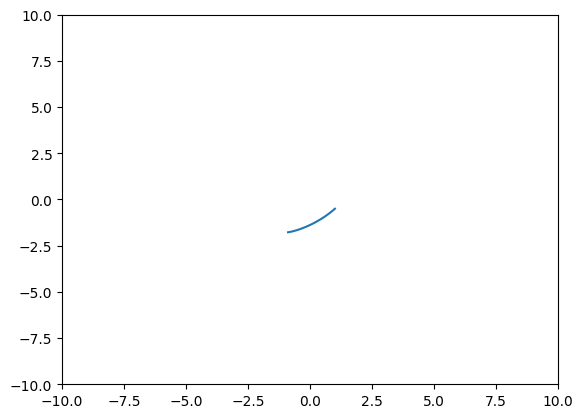

In [48]:
plt.plot(x,y)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

## Soluzione al variare del valore iniziale

La soluzione precedente è un buon metodo per osservare il grafico del problema dato un valore iniziale, ma per capire l'andamento della funzione sul piano $x/y$ diventa necessario vedere il comportamento del problema al variare del punto iniziale.
Un metodo (come visto nel caso *uno-dimensionale*) è quello di scegliere una serie di punti sul piano e tracciare il grafico per questi punti iniziali:

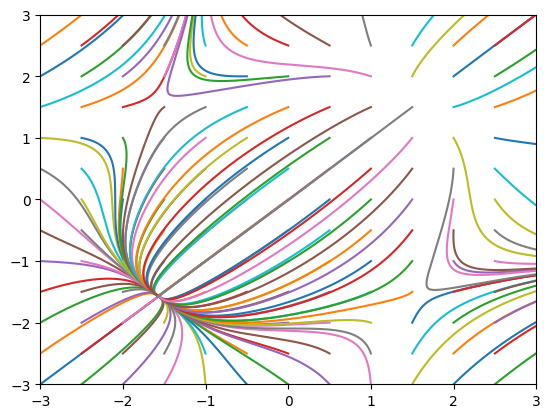

In [55]:
initial_time = 0
final_time = 100
delta_time = 0.01

initial_value_start = -3
initial_value_stop = 3
value_step = 0.5

for initial_value_x in np.arange(initial_value_start, initial_value_stop, value_step):
    for initial_value_y in np.arange(initial_value_start, initial_value_stop, value_step):
        times, x, y = euler_method_2d(initial_time, final_time, (initial_value_x, initial_value_y), delta_time)
        plt.plot(x, y)
plt.xlim(initial_value_start,initial_value_stop)
plt.ylim(initial_value_start,initial_value_stop)
plt.show()

Questo procedimento è sicuramente valido ma rischia di essere poco chiaro per casi particolari e specifici.

## Ritratto di Fase

Per avere una visione più generale, un buon metodo di approccio (approccio prettamente qualitativo ed esplorativo) è quello di disegnare un **Ritratto di Fase**:
In una immaginaria griglia nel piano viene calcolato un punto al tempo $t_{n+1}$, e rappresentato nel grafico come un vettore con la coda nel punto $\begin{bmatrix} x_{t_0} \\ y_{t_0} \end{bmatrix}$ e la testa in $\begin{bmatrix} x_{t_k} \\ y_{t_k} \end{bmatrix}$ con $t_k = t_0 + \Delta t$.

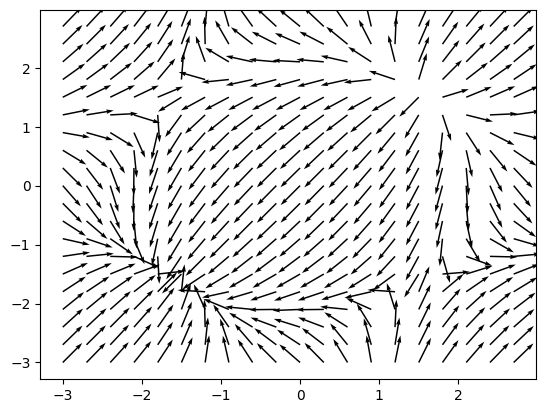

In [50]:
initial_value_start = -3
initial_value_stop = 3
value_step = 0.3

delta_time = 30
for i in np.arange(initial_value_start, initial_value_stop, value_step):
    for j in np.arange(initial_value_start, initial_value_stop, value_step):
        plt.quiver(i, j, chosen_function(i,j,1)[0]*delta_time + i, chosen_function(i,j,1)[1]*delta_time + j, width=0.003)

plt.show()